In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import networkx as nx
import heapq
import time
from utils_SOC_discrete import Biobjective_search_and_heuristic_calc_class, GraphConstructionDiscretization, biobjective_search, extract_costs, check_pareto_optimality, plot_costs, reconstruct_solution_paths

In [2]:
# =============================================================================
# Constants, UAV parameters, and initial conditions
# =============================================================================
# Define QZ circles as tuples (x, y, radius, only_electric_radius, risk_limit, toggle_only_electric_or_no_path) toggle_only_electric_or_no_path = 0 for no path, 1 for only electric
map_qz = [(0.0, 0.0, 6.0, 2.0, 30, 1), (12.0, 10.0, 4.0, 1.5, 30, 1)]
# max_risk_limit = 2 / 3 * sum([circle[-2] for circle in map_qz])
# acceptable_risk_limit = 1 / 3 * sum([circle[-2] for circle in map_qz])
max_risk_limit = 200
acceptable_risk_limit = 0
start = (-5, -5)       # Starting point
goal = (15, 15)        # Goal point

# UAV characteristics
alpha = 0.5
recharge_factor = 2
beta = alpha / recharge_factor

q_min, q_max, q_start = 20, 100, 100
discretization_angle = 10
factor_soc = 8
discretization_SOC = 80/factor_soc
# Risk limits (temporary) and an index map for circles
# risk_limit = {circle: 30 for circle in map_qz}

In [3]:
# =============================================================================
# Graph Construction and Node Creation
# =============================================================================

# Instantiate the graph construction object.
# (Assuming you have already refactored your class into GraphConstructionDiscretization.)
graph_object = GraphConstructionDiscretization(
    map_qz, start, goal, q_min, q_max, alpha, beta, discretization_angle, discretization_SOC, max_risk_limit, acceptable_risk_limit
)

start_time = time.time()
# Create nodes and the index maps.
nodes, index_map, reverse_index_map = graph_object.create_nodes()


# Build the visibility graph
graph_object.build_visibility_graph(reverse_index_map)
end_time = time.time()
print(f"The time req for grap construction: {end_time-start_time}")


The time req for grap construction: 10.943267583847046


In [4]:
# Assign heuristic cost to each node
graph_object.assign_heuristic_costs(reverse_index_map)

# Run the biobjective search
start_state = len(graph_object.SOC)-1
goal_state = len(reverse_index_map)-1

### Biobjective search object 
search_object = Biobjective_search_and_heuristic_calc_class(graph_object, start_state, goal_state)
start_time = time.time()
search_object.Heuristic_calc()
end_time = time.time()
print(f"The time req for heuristic calc: {end_time-start_time}")

start_time = time.time()
sols, g2_min = search_object.biobjective_search(reduce_factor=1)
end_time = time.time()
print(f"The time req for search: {end_time-start_time}")

Calculating heuristic
The time req for heuristic calc: 2.443617582321167
The time req for search: 135.38510084152222


In [ ]:
# # Assign heuristic cost to each node
# graph_object.assign_heuristic_costs(reverse_index_map)

# # Run the biobjective search
# start_state = len(graph_object.SOC)-1
# # goal_state = list(range(factor_soc+1, 2*factor_soc+1,1))
# goal_state = len(reverse_index_map)-1

# start_time = time.time()
# sols, g2_min = biobjective_search(graph_object, start_state, goal_state, reduce_factor=1)
# end_time = time.time()
# print(f"The time req for biobjective_search: {end_time-start_time}")
# # =============================================================================
# # Pareto Optimality Check and Plotting
# # =============================================================================

Minimum fuel cost: 19.730019887642012, Minimum risk cost: 35.1430649867848
Dominated solution indices: []


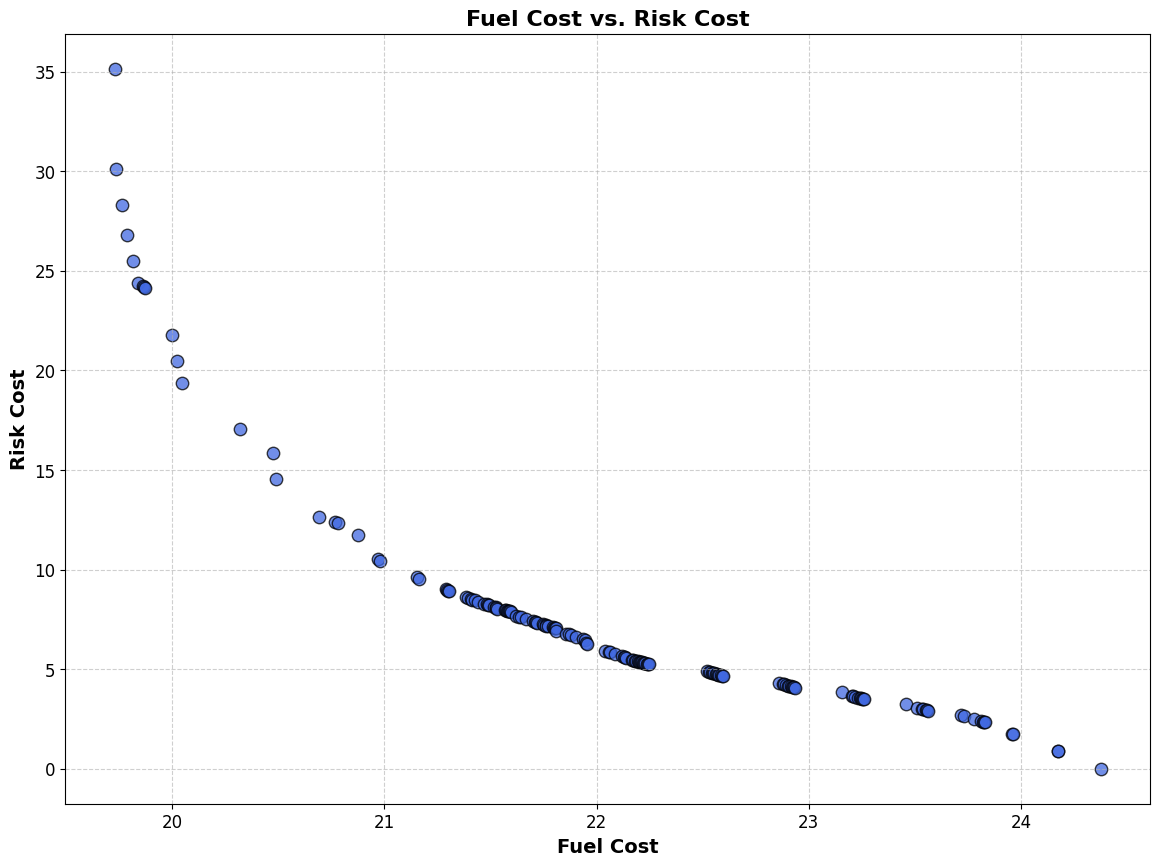

In [5]:
# Extract cost values for the goal state
fuel_costs, risk_costs = extract_costs(sols, goal_state)

min_fuel_value, min_fuel_index = min((value, index) for index, value in enumerate(fuel_costs))
min_risk_value = risk_costs[min_fuel_index]
print(f"Minimum fuel cost: {min_fuel_value}, Minimum risk cost: {min_risk_value}")
# Check Pareto optimality
dominated_indices = check_pareto_optimality(fuel_costs, risk_costs)
print("Dominated solution indices:", dominated_indices)

# Plot the results
plot_costs(fuel_costs, risk_costs)

In [ ]:
# Reconstruct and print all solution paths
solution_paths = reconstruct_solution_paths(sols, start_state, goal_state)
print("Extracted Solution Paths:")
for spath in solution_paths:
    print(spath)
# =============================================================================
# End of Pipeline
# =============================================================================

In [ ]:
# import random
# ##### Plotting the solution path for which passes thru certain state
# plt.figure(figsize=(14, 10))
# random.seed(42)
# colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(len(paths_with_22_xy))]

# for i, path in enumerate(paths_with_22_xy):
#     x, y = zip(*path)
#     plt.plot(x, y, marker='o', linestyle='-', color=colors[i], label=f'{float(paths_with_22[i][-1][0]):.2f},{float(paths_with_22[i][-1][1]):.2f}')

# for x_c, y_c, r in Map_qz:
#     circle = plt.Circle((x_c, y_c), r, color='gray', alpha=0.3, fill=True)
#     plt.gca().add_patch(circle)

# ### Start and goal points
# plt.scatter(start[0], start[0], color='black', marker='s', s=100, label='Start' )
# plt.scatter(goal[0], goal[0], color='red', marker='*', s=150, label='Goal')

# # Formatting
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.legend()
# plt.axis("equal")  # Ensure aspect ratio is equal
# plt.grid(True)
# plt.title("Paths with Circles and Start/Goal Points")
# plt.show()